In [158]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score , classification_report,mean_absolute_error# Regression
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,confusion_matrix # Classification

import pickle


In [159]:
# Reading csv file and convertin into dataframe
df = pd.read_csv('C:/Users/Admin/Downloads/Copper_Set.xlsx - Result 1.csv')
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [160]:
# checking null values and missing values
df.shape
missing_values = df.isnull().sum()
print(missing_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [162]:
# Alinging the data in same format

df['item_date'] = pd.to_datetime(df['item_date'],format = '%Y%m%d',errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [163]:
missing_values = df.isnull().sum()
print(missing_values)
df.shape

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64


(181673, 14)

In [164]:
# Handling missing values in 'material_ref' column

df['material_ref'].fillna('unknown',inplace=True)

# Remove remaining null values 

df = df.dropna()

In [165]:
missing_values = df.isnull().sum()
print(missing_values)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [166]:
# Make a copy of dataframe for selling price prediction analysis

df_selling_price = df.copy()
df_selling_price.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


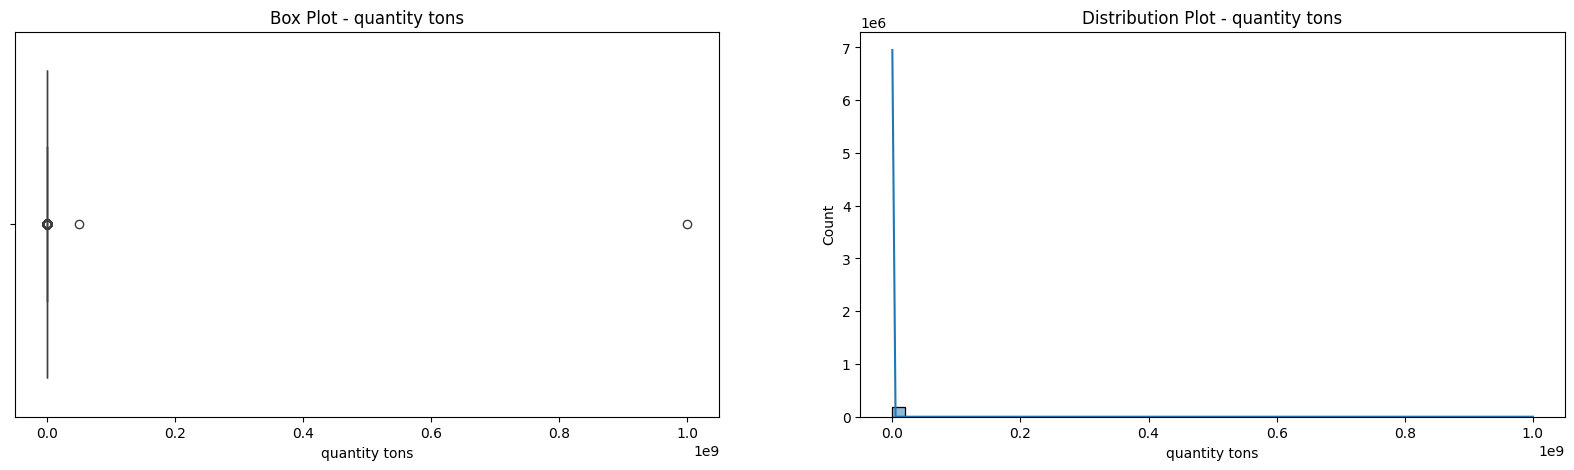

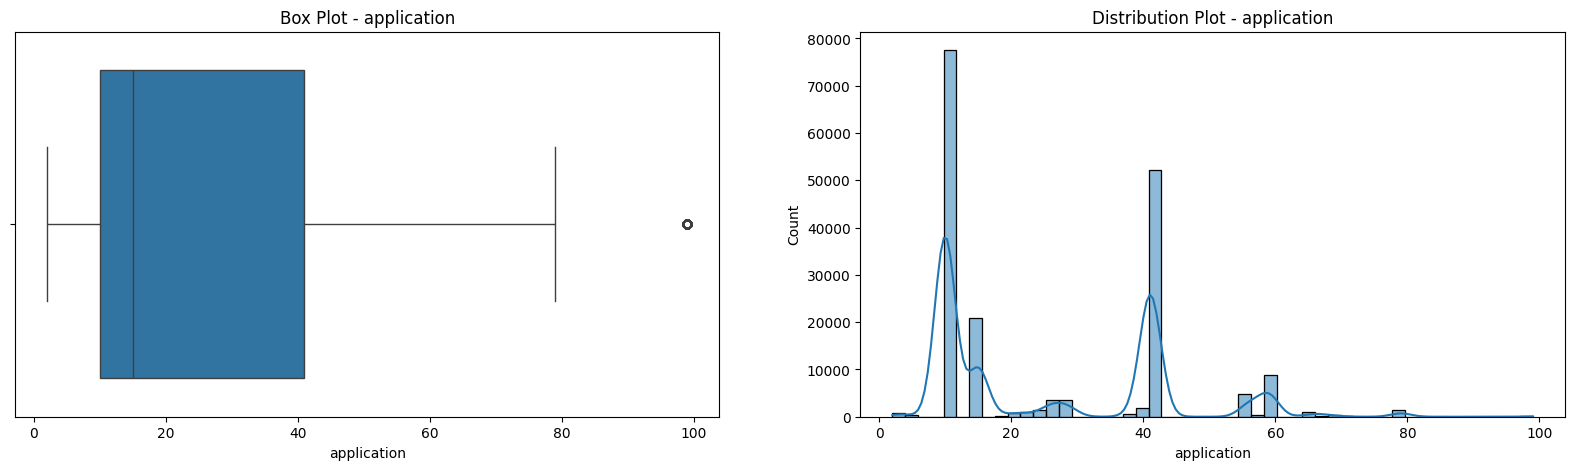

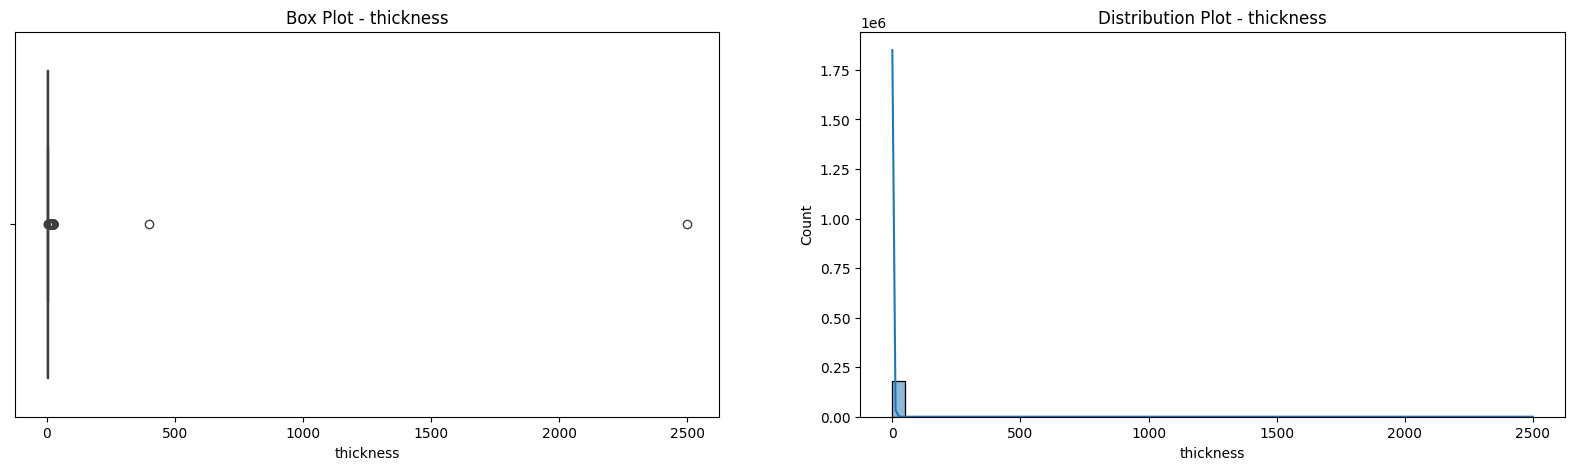

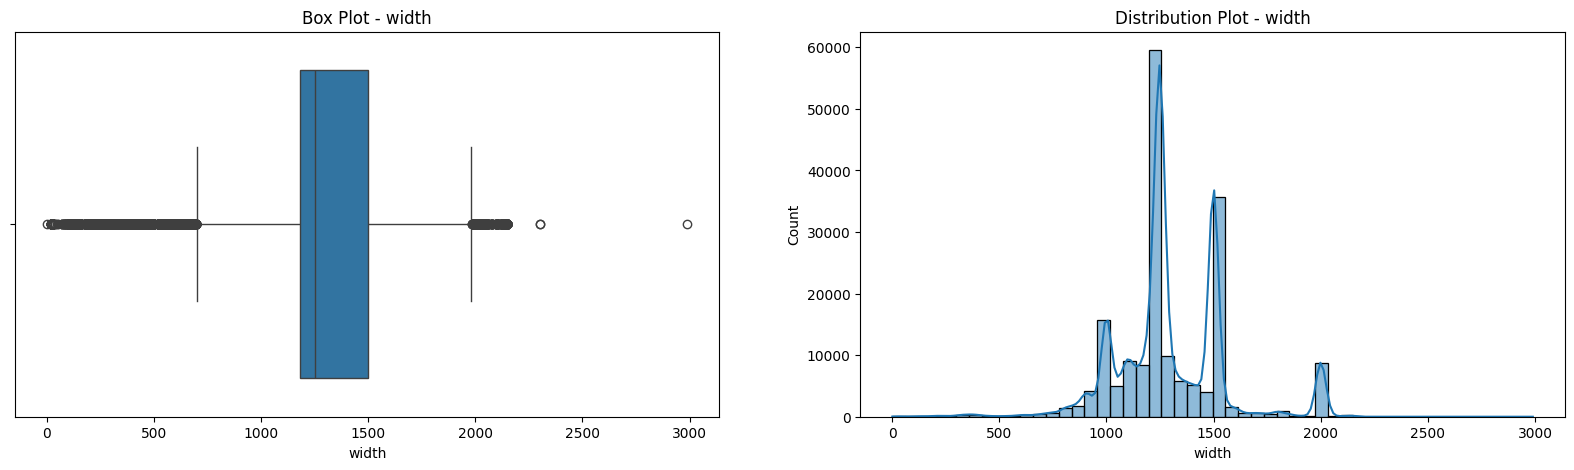

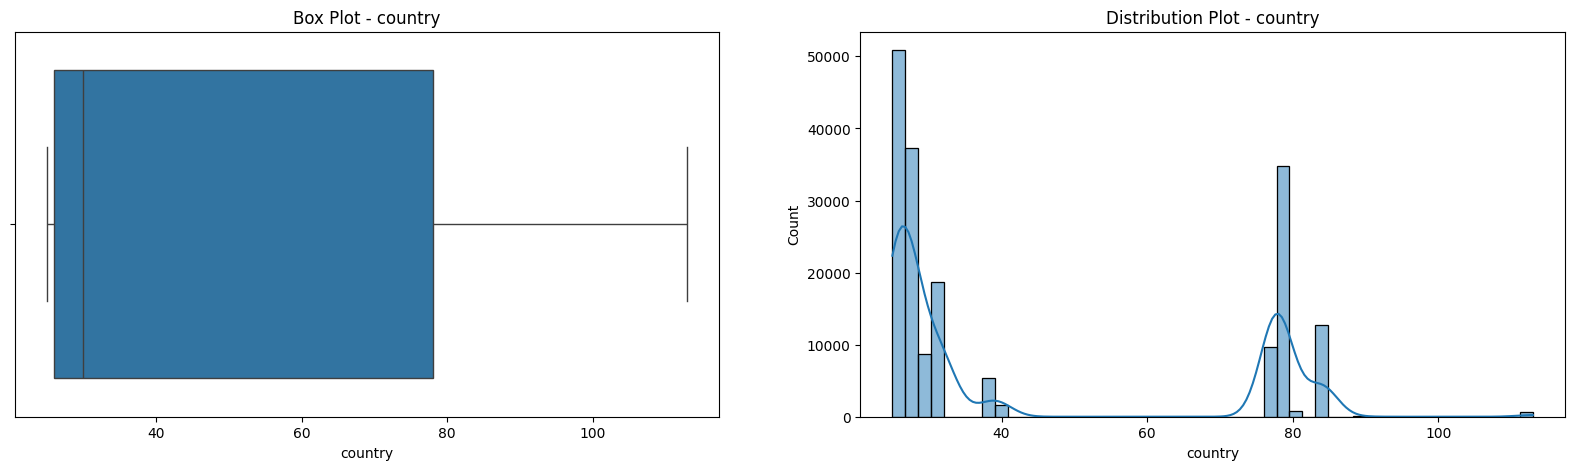

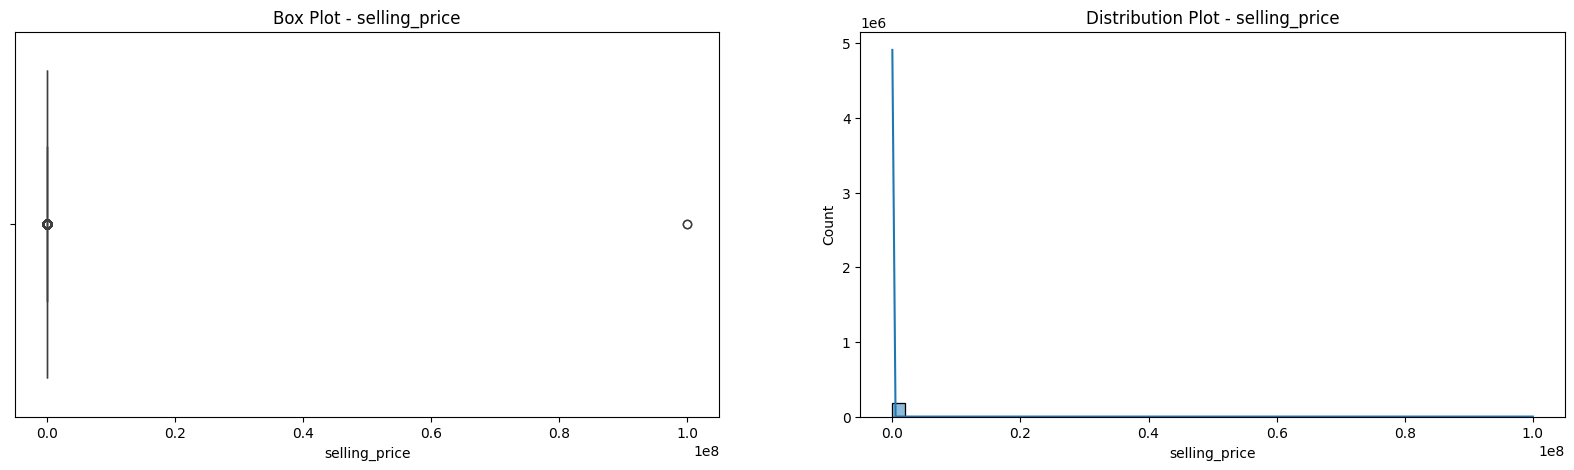

In [167]:
# Plot data to check the outliers

columns = ['quantity tons','application', 'thickness', 'width','country', 'selling_price']

for column in columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_selling_price,x=column)
    plt.title(f'Box Plot - {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df_selling_price, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot - {column}')

In [168]:
# Outliers
 
# df_selling_price['quantity tons']
# df_selling_price['thickness']
# df_selling_price['selling_price']

In [169]:
# Removing outliers using log method and IQR & clip method

# Removing negative and zero values before applying log
mask1 = df_selling_price['selling_price'] <= 0
print(mask1.sum())
df_selling_price.loc[mask1, 'selling_price'] = np.nan

mask1 =df_selling_price['quantity tons'] <= 0
print(mask1.sum())
df_selling_price.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_selling_price['thickness'] <= 0
print(mask1.sum())

7
4
0


In [170]:
df_selling_price.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [171]:
df_selling_price.dropna(inplace=True)
df_selling_price.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [172]:
# applying log
df_selling_price['quantity tons'] = np.log(df_selling_price['quantity tons'])
df_selling_price['selling_price'] = np.log(df_selling_price['selling_price'])
df_selling_price['thickness'] = np.log(df_selling_price['thickness'])

In [173]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def removing_outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
     

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

removing_outlier(df_selling_price, 'quantity tons')
removing_outlier(df_selling_price, 'thickness')
removing_outlier(df_selling_price, 'selling_price')
removing_outlier(df_selling_price, 'width')


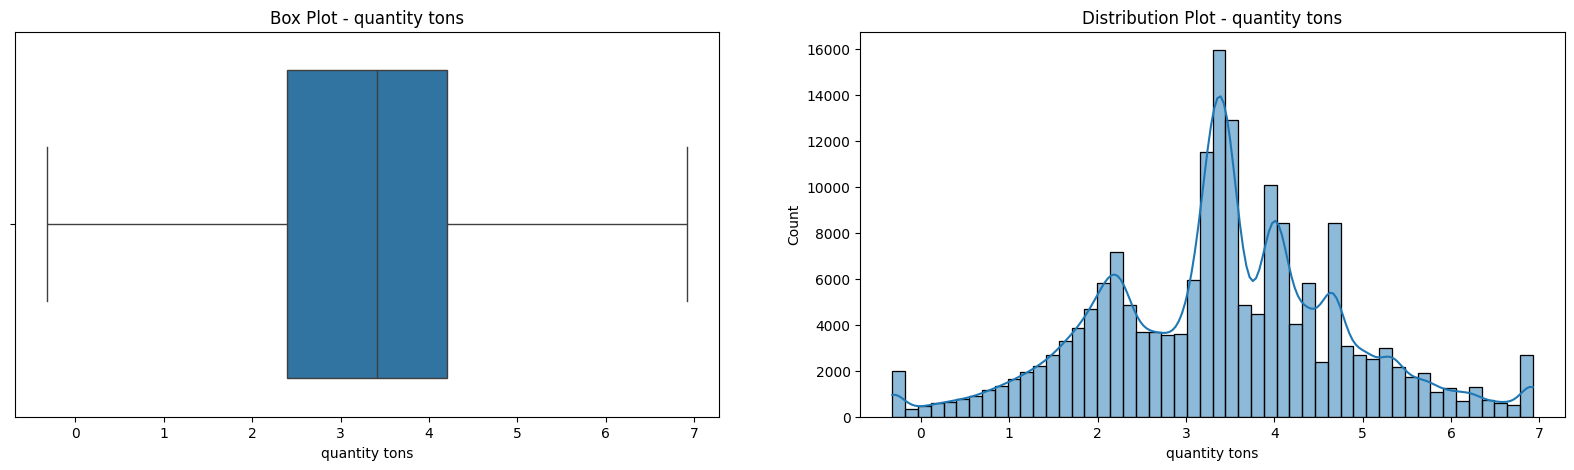

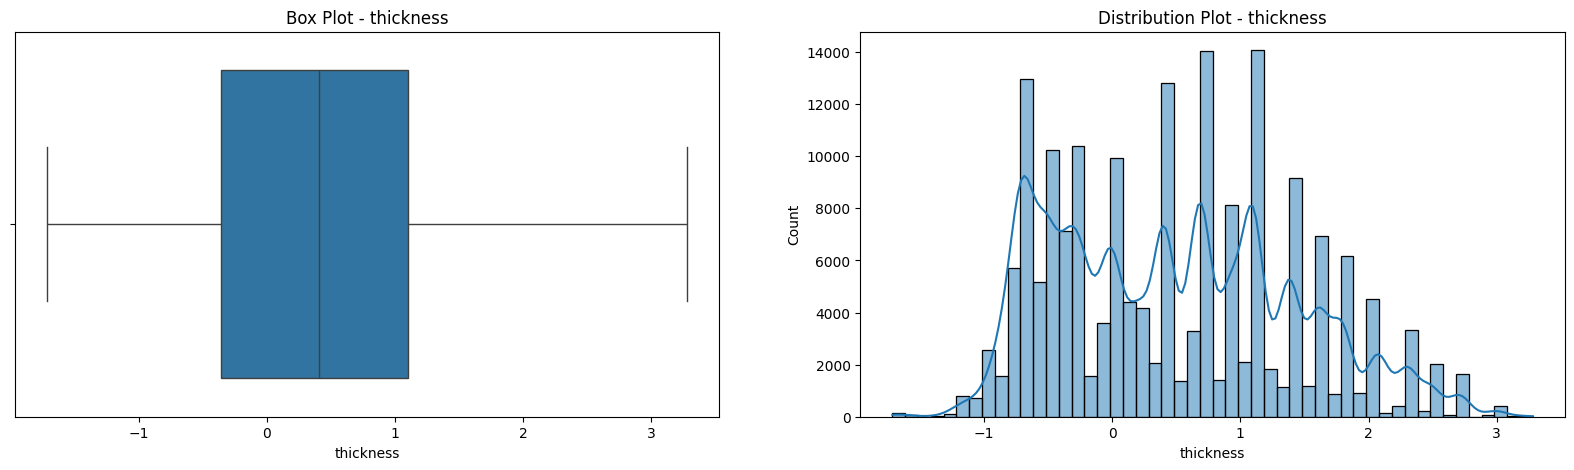

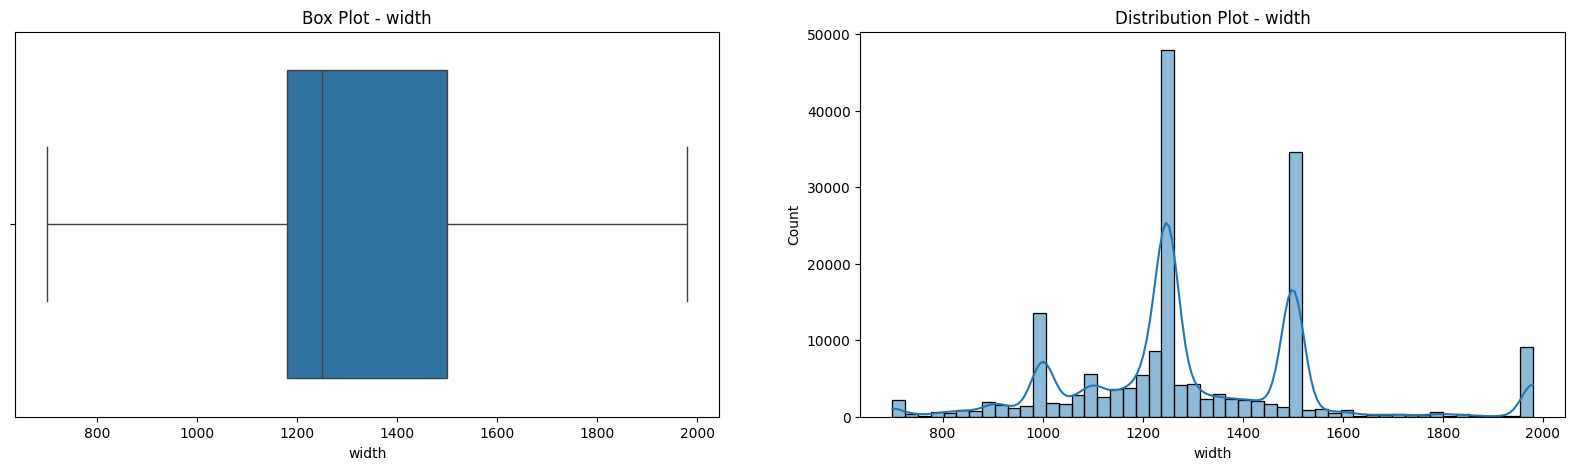

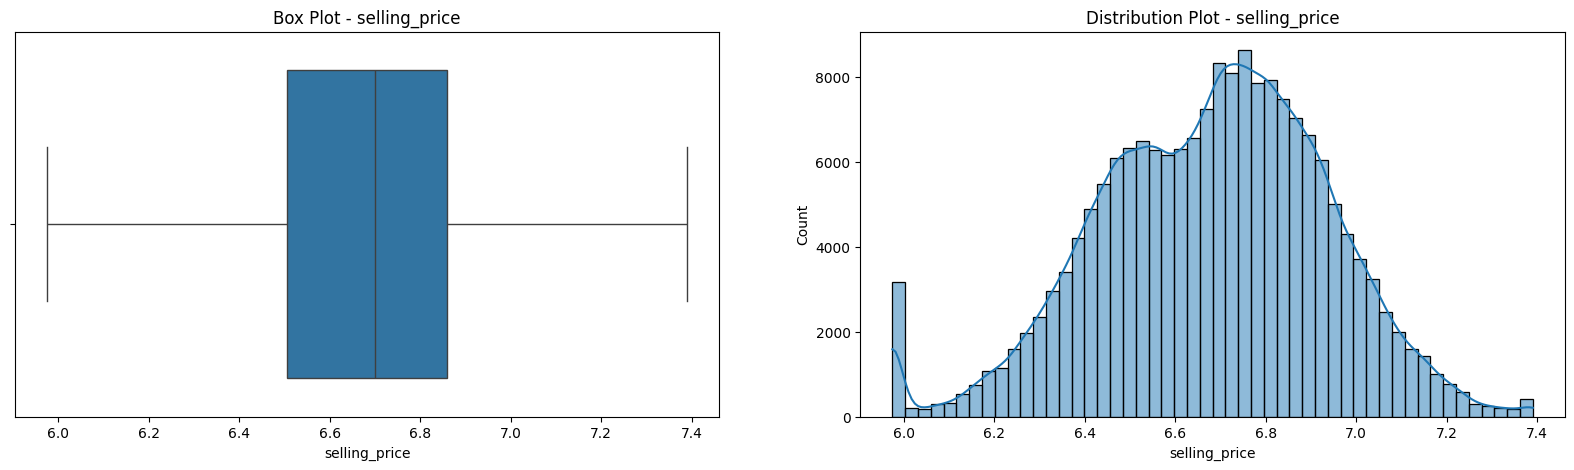

In [174]:
# Plot data after removing the outliers

columns = ['quantity tons', 'thickness', 'width', 'selling_price']

for column in columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_selling_price,x=column)
    plt.title(f'Box Plot - {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df_selling_price, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot - {column}')

<Axes: >

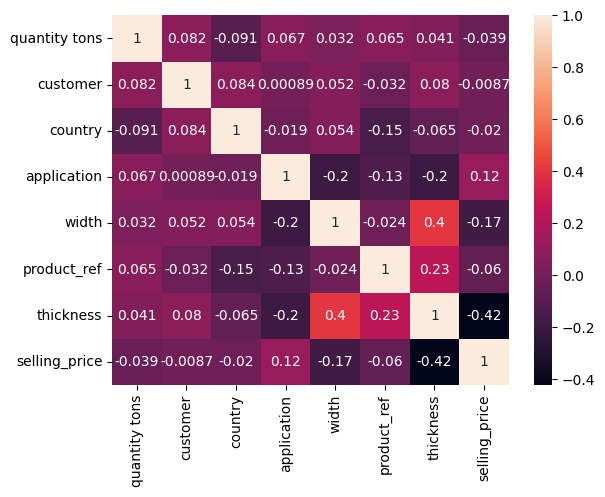

In [175]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

cols = ['quantity tons','customer','country','application','width','product_ref','thickness','selling_price']
df_heatmap = df_selling_price[cols].corr()
sns.heatmap(df_heatmap, annot=True)

Regression Model Building

In [176]:
df_selling_price["status"] = df_selling_price["status"].replace({'Won': 1, 'Draft': 7, 'To be approved': 6, 'Lost': 0, 'Not lost for AM': 2, 'Wonderful': 8, 'Revised': 5, 'Offered': 4, 'Offerable': 3})
df_selling_price["item type"] = df_selling_price["item type"].replace({'W': 5, 'WI': 6, 'S': 3, 'Others': 1, 'PL': 2, 'IPL': 0, 'SLAWR': 4})


In [177]:
df_selling_price.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,5,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,5,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,1,6,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211


In [178]:
df_selling_price.to_csv('CopperRegression.csv',index = False)


In [179]:
x1=df_selling_price.drop(['id','material_ref',"selling_price", 'item_date', 'delivery date'],axis=1)
y1=df_selling_price["selling_price"]
     

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)


In [181]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics


In [182]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}


decisiontree Regressor accuracy score:  0.9976633977049612 0.5140250524050467
RandomForestRegressor accuracy score:  0.9576755602084309 0.71198562733256
GradientBoostingRegressor accuracy score:  0.5184065418738467 0.5194001905443211
AdaBoostRegressor accuracy score:  0.4198978150297088 0.4188937680385062
Extra Trees Regressor accuracy score:  0.9976633977049612 0.6566208710490749


In [183]:
# Applying RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test
     

(0.8637911965609382, 0.72445542262444)

In [184]:
model1 = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics

{'R2': 0.7241127028214536,
 'Mean Absolute Error': np.float64(0.10230555760830944),
 'Mean Squared Error': np.float64(0.017968922368153065),
 'Root Mean Squared Error': np.float64(0.13404820911952933)}

In [185]:
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [208]:
from joblib import dump, load
dump(model1, 'regression_model.joblib')

['regression_model.joblib']

In [187]:
# load the pickle model to predict selling price

with open('D:/Data science projects/Industrial copper modeling/regression_model.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [188]:
x1.head(3)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1,5,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1,5,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1,6,28.0,-0.967584,952.0,628377


In [189]:
y_pred = model1.predict(np.array([[15.447678,30202938.0,	25.0,	1.0,	5,	41.0,	0.693147,	1210.0,	1668701718]]))
np.exp(y_pred[0])

np.float64(958.8999888399321)

Classification Model Building

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
df_status_pred = df_selling_price.copy()
df_status_pred.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,5,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,5,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,1,6,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211


In [193]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_status_pred = df_status_pred[(df_status_pred.status == 1) | (df_status_pred.status == 0)]

In [195]:
df_status_pred.shape


(150427, 14)

In [196]:
df_status_pred.status.value_counts()


status
1    115996
0     34431
Name: count, dtype: int64

In [199]:
x2=df_status_pred.drop(["status",'id', 'material_ref','item_date', 'delivery date'],axis=1)
y2=df_status_pred["status"]

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.1)

In [201]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def ExtraTreesClassifier(self):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Extra Trees Classifier accuracy score: ",accuracy)
    return accuracy

In [202]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesClassifier': model.ExtraTreesClassifier()}

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")
     

Decision Tree Classifier accuracy score:  0.9220235325400519
Random Forest Classifier accuracy score:  0.9369806554543642
Gradient Boosting Classifier accuracy score:  0.8323472711560194
AdaBoost Classifier accuracy score:  0.8128032972146514
Extra Trees Classifier accuracy score:  0.93438808748255

Maximum accuracy score: 0.9370 achieved by RandomForest classifier.



In [203]:
# proceed with RandomForestClassifier model
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))


[[ 2768   609]
 [  383 11283]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3377
           1       0.95      0.97      0.96     11666

    accuracy                           0.93     15043
   macro avg       0.91      0.89      0.90     15043
weighted avg       0.93      0.93      0.93     15043



In [204]:
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [205]:
from joblib import dump, load
dump(model, 'class_model.joblib')

['class_model.joblib']

In [206]:
x2.head(5)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5,10.0,0.693147,1500.000,1670798778,6.749931
1,6.643822,30202938.0,25.0,5,41.0,-0.223144,1210.000,1668701718,6.953684
2,5.956169,30153963.0,30.0,6,28.0,-0.967584,952.000,628377,6.468211
3,5.310301,30349574.0,32.0,3,59.0,0.832909,1317.000,1668701718,6.643790
4,6.666354,30211560.0,28.0,5,10.0,1.386294,1980.375,640665,6.357842


In [207]:
with open('D:/Data science projects/Industrial copper modeling/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[54.151139,30156308.0,28.0,5,10.0,0.693147,1500.0,1670798778,	85.0]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won
